# **CO2 Regression analysis on 86 countries and UK’s Forecast Analysis, leveraging records from the vast majority of countries worldwide**

###**A Machine Learning Project**
####by Fabian Chukwunonso Umeh
   ***
##**Phase 4: Forcast analysis**
***
### **Phase 4 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Summary
 4. Time series Analysis
 5. Forecast for next three years


***
###**1. Project Overview**
**Aim of project:** Forecasting features to make co2 prediction for France.
***
### **Notebook summary - Phase 4: Forcast analysis with forcasting machine learning models**
***

**Input:** CSV (comma separated values) data file from owid website(Our World In Data).

**Output:** Forcasting model

**Programming language:** Python 3.7

**Libraries used in this notebook:** .

**External package to be installed:** .

***
 A special aknowledgement to **Stats model** whose examples has been adopted.
 ***
### **Data source**
The used data stems from the Co2 and greenhouse gas emissions by Our World In Data. It includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics. __[Here](https://github.com/owid/co2-data)__ is the link to the dataset

**Note:** The dataset is updated regularly and may differ slightly with the one used for this analysis.
***
### **2. Notebook setup - Libraries and data imports**
***
Importing Libraries:


In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics
import math
from math import sqrt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#importing the different randoms
import os
import numpy.random as nr
import random as rn
import tensorflow as tf

os.environ['PYTHONHASHSEED']='0'
nr.seed(24)

In [ ]:
#read file 
work_df = pd.read_csv('Cleaned_data.csv')

In [ ]:
print('A brief view of data before EDA')
work_df.head()

A brief view of data before EDA


,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,13.651
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246


### 3.0 Data Summary
- 3.1 Shape of the data
- 3.2 Statisistical summary


In [ ]:
#shape of dataset 
work_df.shape  #25204 rows and 58 columns

(3000, 11)

In [ ]:
# data information
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     3000 non-null   object 
 1   year                        3000 non-null   int64  
 2   co2                         3000 non-null   float64
 3   coal_co2                    3000 non-null   float64
 4   cement_co2                  3000 non-null   float64
 5   gas_co2                     3000 non-null   float64
 6   oil_co2                     3000 non-null   float64
 7   methane                     3000 non-null   float64
 8   population                  3000 non-null   float64
 9   gdp                         3000 non-null   float64
 10  primary_energy_consumption  3000 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 257.9+ KB



### 4.0 Time Series Analysis

### USING TIMESERIES MODELS FOR FORECASTING CO2 Using United Kingdom as Case study. For this analysis, we will employ eight models:
- Simple Exponential Method
- Holt's Linear method
- Holt's Exponential method
- Holt's Additive damped method
- Facebook Prophet
- MLP
- CNN
- LSTM
***
**Functions for handling Traditional Models**

In [ ]:
def select_country(df, name, feature):
  country = df[df['country'] == name]
  data = country[['year', feature]]
  data['year'] = pd.date_range(start = '1991', end = '2021', freq='A')
  data = data.set_index('year')
  return data

def decopose_df(df):
  decompose = seasonal_decompose(df)
  plt.figure(figsize=(20,12))
  decompose.plot()
  plt.show()
  return 

def plot_country_data(df, feature):
  return df.plot(xlabel = 'Date', ylabel = feature)

def split_data(df, train_size):
  train = df[: int(len(df)*train_size)]
  test = df[- math.ceil(len(df)*(1-train_size)) :]
  return train, test

def metric(fcast, test):
  mae = mean_absolute_error(test,fcast)
  print('MAE : %3f' % mae)
  mse = mean_squared_error(test,fcast)
  print('MSE : %3f' % mse)
  rmse = sqrt(mse)
  print('RMSE : %3f' % rmse)
  mape = mean_absolute_percentage_error(test,fcast)
  print('MAPE : %3f' % mape)

def SES(train, test, fcast_num_years):
  warnings.filterwarnings('ignore')
  model = SimpleExpSmoothing(train).fit(
      optimized=True
  )
  fitted_val = model.fittedvalues
  fcast = model.forecast(fcast_num_years)

  plt.figure(figsize=(12,8))
  plt.plot(train, marker="o", color="blue")
  (line1,) = plt.plot(test, marker="o", color="blue")
  plt.plot(fitted_val, marker="o", color="red")
  (line2,) = plt.plot(fcast, marker="o", color="red")
  plt.legend([line1, line2], ["Actual", "Forecasted"])
  plt.title('Simple Exponential Smothing model')
  plt.xlabel('year')
  plt.ylabel('co2 [MT]')
  plt.show()

  return fcast

def Holts_linear(train, test, fcast_num_years):
  model = Holt(train).fit()
  
  fitted_val = model.fittedvalues
  fcast = model.forecast(fcast_num_years)

  plt.figure(figsize=(12,8))
  plt.plot(train, marker="o", color="blue")
  (line1,) = plt.plot(test, marker="o", color="blue")
  plt.plot(fitted_val, marker="o", color="red")
  (line2,) = plt.plot(fcast, marker="o", color="red")
  plt.legend((line1, line2), ['Actual', 'Forecasted'])
  plt.title('Holt winter linear model')
  plt.xlabel('year')
  plt.ylabel('co2 [MT]')
  plt.show()

  return fcast
def Holts_Exp(train, test, fcast_num_years):
  model = Holt(train, exponential =True).fit()
  
  fitted_val = model.fittedvalues
  fcast = model.forecast(fcast_num_years)

  plt.figure(figsize=(12,8))
  plt.plot(train, marker="o", color="blue")
  (line1,) = plt.plot(test, marker="o", color="blue")
  plt.plot(fitted_val, marker="o", color="red")
  (line2,) = plt.plot(fcast, marker="o", color="red")
  plt.legend((line1, line2), ['Actual', 'Forecasted'])
  plt.title('Holt winter Exponential model')
  plt.xlabel('year')
  plt.ylabel('co2 [MT]')
  plt.show()

  return fcast

def Holts_ADDdamped(train, test, fcast_num_years):
  model = Holt(train, damped = True).fit()
  
  fitted_val = model.fittedvalues
  fcast = model.forecast(fcast_num_years)

  plt.figure(figsize=(12,8))
  plt.plot(train, marker="o", color="blue")
  (line1,) = plt.plot(test, marker="o", color="blue")
  plt.plot(fitted_val, marker="o", color="red")
  (line2,) = plt.plot(fcast, marker="o", color="red")
  plt.legend((line1, line2), ['Actual', 'Forecasted'])
  plt.title('Holt winter Damped model')
  plt.xlabel('year')
  plt.ylabel('co2 [MT]')
  plt.show()

  return fcast

def prophet(df, country, feature, train_size, fcast_num_years):
  data = df[df['country'] == country]
  fb_data = data[['year', feature]].rename(columns = {'year':'ds',feature:'y'})
  fb_data['ds'] = pd.date_range(start='1991',end='2021',freq='A')
  
  train = fb_data[: int(len(df)*train_size)]
  test = fb_data[- math.ceil(len(df)*(1-train_size)) :] 
 

  model = Prophet()
  model.fit(train)

  future = model.make_future_dataframe(
      periods=fcast_num_years, freq='A'
  )
  fcast = model.predict(future)

  model.plot(fcast);

  
  return fcast


#### **4.1. Traditional Models**

<Figure size 1440x864 with 0 Axes>

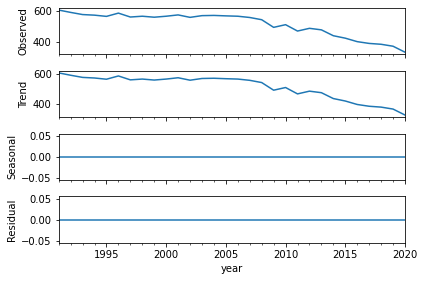

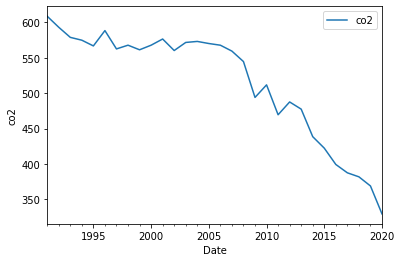

In [ ]:
UK_co2 = select_country(work_df, 'United Kingdom', 'co2')
decopose_df(UK_co2)
plot_country_data(UK_co2, 'co2')


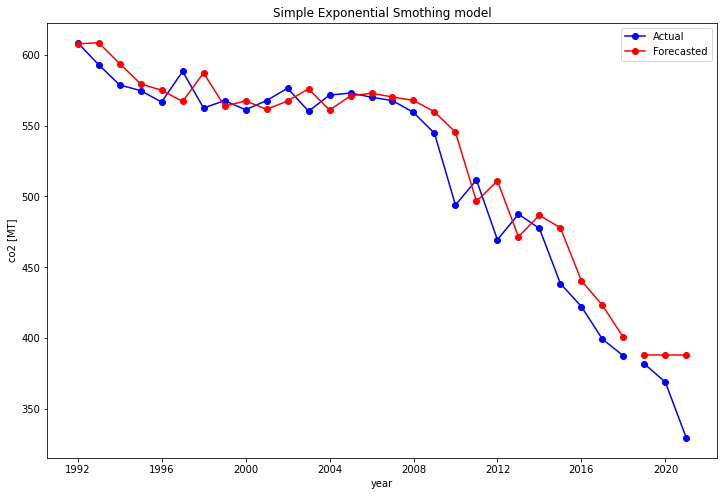

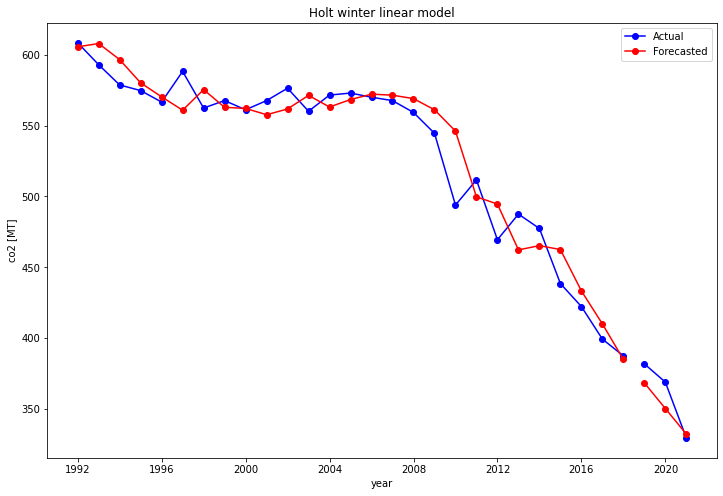

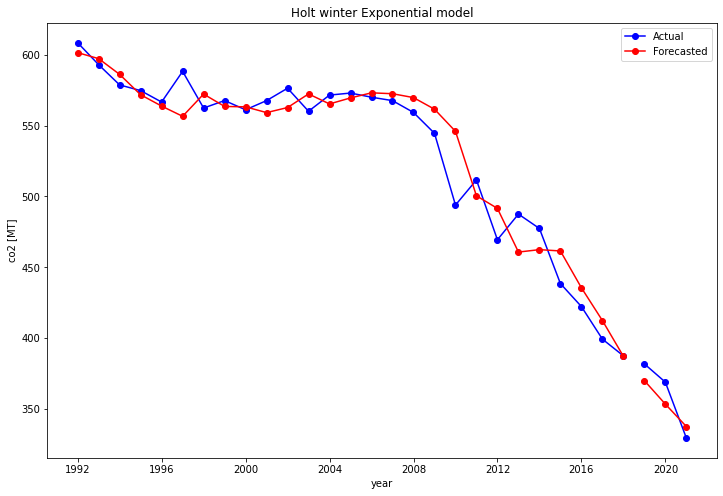

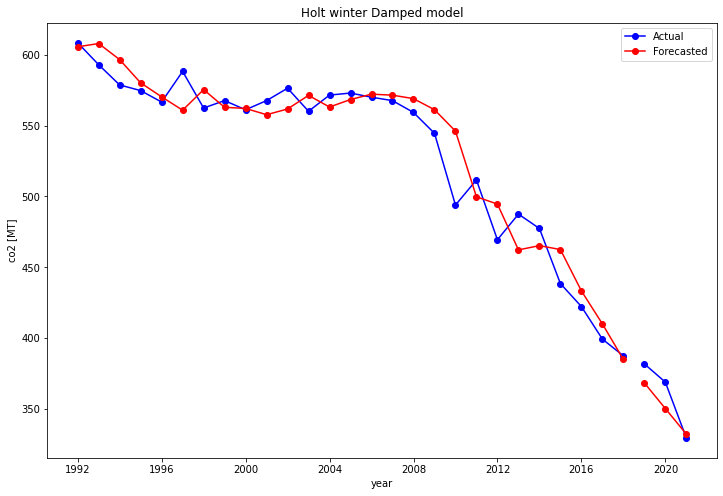

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


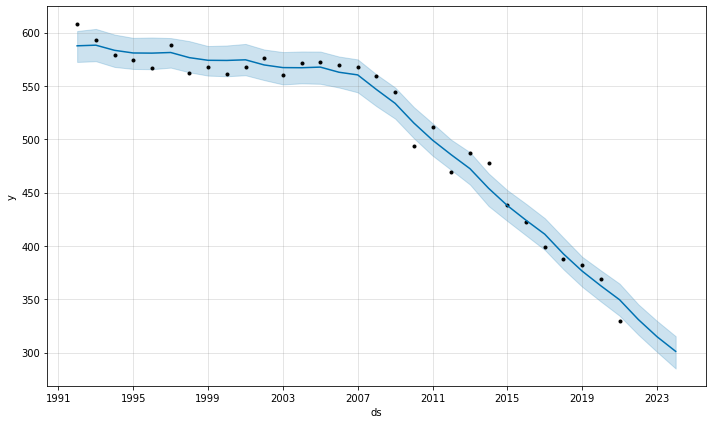

In [ ]:
train, test = split_data(UK_co2,0.9)
fcast1_co2 = SES(train,test,3)
fcast2_co2 = Holts_linear(train,test,3)
fcast3_co2 = Holts_Exp(train,test,3)
fcast4_co2 = Holts_ADDdamped(train,test,3)
fcast5_co2 = prophet(work_df, 'United Kingdom', 'co2', 0.9, 3)
fcast_sub_co2 = fcast5_co2['yhat'][-3:]

In [ ]:
print('SES Method \n')
metric(fcast1_co2,test)
print('\nHolts Linear Method \n')
metric(fcast2_co2,test)
print('\nHolts Exponential Method \n')
metric(fcast3_co2,test)
print('\nHolts Additive damp Method \n')
metric(fcast4_co2,test)
print("\nFacebook's Prophet \n")
metric(fcast_sub_co2,test)

SES Method 

MAE : 28.068950
MSE : 1283.103628
RMSE : 35.820436
MAPE : 0.082211

Holts Linear Method 

MAE : 11.589213
MSE : 178.088657
RMSE : 13.344986
MAPE : 0.031292

Holts Exponential Method 

MAE : 11.806030
MSE : 148.448889
RMSE : 12.183960
MAPE : 0.032511

Holts Additive damp Method 

MAE : 11.589198
MSE : 178.084108
RMSE : 13.344816
MAPE : 0.031292

Facebook's Prophet 

MAE : 44.363600
MSE : 2098.220654
RMSE : 45.806339
MAPE : 0.121740


#### **4.2 Forecasting with deep learning models**
***
##### **4.2.1 MLP ANN**

In [ ]:
UK_data = select_country(work_df, 'United Kingdom', 'co2')
UK_data = array(UK_co2).ravel().reshape(-1,1)

def standardization(df):
  #Data Standardization
  scaler = StandardScaler()
  scaler.fit(df) 
  data = scaler.transform(df)
  return data, scaler
#Data Standardization
data, scaler = standardization(UK_data)

In [ ]:
#Turn the univariate sequence to supervised learning task
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    #Get the end of each pattern iteratively
    end_ts = i + n_steps_in
    out_ts = end_ts + n_steps_out
    #Check for exceeded sequence
    if out_ts > len(sequence):
      break;
    #Get the X any y part of each pattern 
    seqx, seqy = sequence[i:end_ts], sequence[end_ts:out_ts]
    X.append(seqx)
    y.append(seqy)
  return array(X), array(y)

#Data Split
def split_data(X,y):
  X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1], y[-1:]
  return X_train, X_test, y_train, y_test

In [ ]:
n_steps_in, n_steps_out = 3, 3
X, y = split_sequence(data, n_steps_in, n_steps_out)
#Data Split
X_train, X_test, y_train, y_test = split_data(X,y)

rn.seed(0)
tf.random.set_seed(0)

#Model Build
model = Sequential()
model.add(Dense(12, activation='relu', input_dim = n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=2500, verbose=0)

In [ ]:
#Model Metrics
yhat = model.predict(X_test)
yhat = scaler.inverse_transform(yhat)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
test = scaler.inverse_transform(y_test).copy()

print('MLP ANN metrics')
metric(yhat,test)

MLP ANN metrics
MAE : 10.083359
MSE : 113.210856
RMSE : 10.640059
MAPE : 0.027516


#### **4.2.2 Convolutional Neural network model**

In [ ]:
UK_data = select_country(work_df, 'United Kingdom', 'co2')
UK_data = array(UK_co2).ravel().reshape(-1,1)

#Data Standardization
data, scaler = standardization(UK_data)

n_in, n_out = 3, 3
X, y = split_sequence(data, n_in, n_out)

#get the number of features
n_features = X.shape[2]

#Data Split
X_train, X_test, y_train, y_test = split_data(X,y)

In [ ]:
rn.seed(24)
tf.random.set_seed(24)

model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_in,
    n_features)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(60,activation='relu'))
model1.add(Dense(n_out))
model1.compile(optimizer='adam', loss='mse')

model1.fit(X_train, y_train, epochs=2000, verbose=0)


In [ ]:
yhat = model1.predict(X_test)
yhat = scaler.inverse_transform(yhat)
y_test = y_test.reshape(y_test.shape[0],y_test.shape[1])
test = scaler.inverse_transform(y_test)

metric(yhat, test)

MAE : 10.740647
MSE : 171.977431
RMSE : 13.114017
MAPE : 0.030851


#### **4.2.3 Long-short term memory Neural Network**

In [ ]:
UK_data = select_country(work_df, 'United Kingdom', 'co2')
UK_data = array(UK_co2).ravel().reshape(-1,1)


#Data Standardization
data, scaler = standardization(UK_data)

n_in, n_out = 3, 3
X, y = split_sequence(data, n_in, n_out)

#get the number of features
n_features = X.shape[2]

#Data Split
X_train, X_test, y_train, y_test = split_data(X,y)

In [ ]:
rn.seed(5)
tf.random.set_seed(5)

model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(n_in,
      n_features)))
model2.add(RepeatVector(n_out))
model2.add(LSTM(100, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(1)))
model2.compile(optimizer='adam', loss='mse')

model2.fit(X_train, y_train, epochs=2000, verbose=0)

In [ ]:
yhat = model2.predict(X_test)
yhat = yhat.reshape(yhat.shape[0], yhat.shape[1])
yhat = scaler.inverse_transform(yhat)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
test = scaler.inverse_transform(y_test)

metric(yhat,test)

MAE : 11.594393
MSE : 174.968814
RMSE : 13.227578
MAPE : 0.033264


## **5.0 Making forecast for the next three years**
***
**5.1 Neural Net's Forecasts**

In [ ]:
#making forecast for next three years
year = ['2021','2022','2023']
MLP_fcast = model.predict(y_test)
MLP_fcast = pd.DataFrame(scaler.inverse_transform(MLP_fcast)).T
MLP_fcast['year'] = pd.to_datetime(year)
MLP_fcast = MLP_fcast.set_index('year')

CNN_fcast = model1.predict(y_test)
CNN_fcast = pd.DataFrame(scaler.inverse_transform(CNN_fcast)).T
CNN_fcast['year'] = pd.to_datetime(year)
CNN_fcast = CNN_fcast.set_index('year')

LSTM_fcast = model2.predict(y_test)
LSTM_fcast = LSTM_fcast.reshape(LSTM_fcast.shape[0], LSTM_fcast.shape[1])
LSTM_fcast = pd.DataFrame(scaler.inverse_transform(LSTM_fcast)).T
LSTM_fcast['year'] = pd.to_datetime(year)
LSTM_fcast = LSTM_fcast.set_index('year')

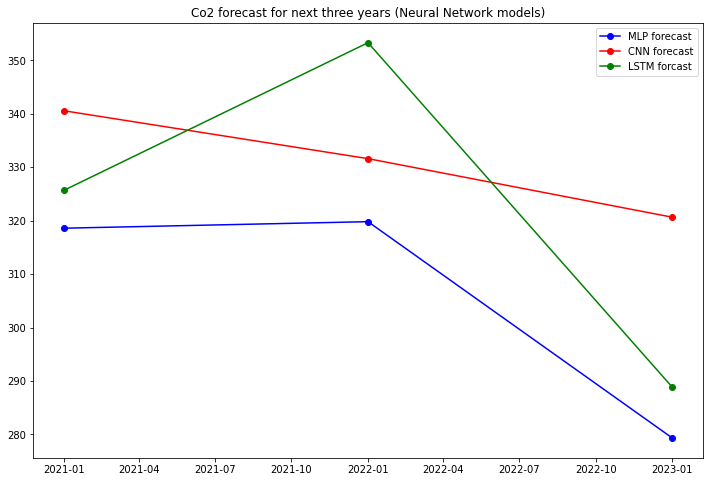

In [ ]:
plt.figure(figsize=(12,8))
#plt.plot(UK_data, marker="o", color="blue")
(line1,) = plt.plot(MLP_fcast, marker="o", color="blue")
(line2,) = plt.plot(CNN_fcast, marker="o", color="red")
(line3,) = plt.plot(LSTM_fcast, marker="o", color="green")
plt.legend([line1, line2, line3], ["MLP forecast", "CNN forecast", 'LSTM forcast'])
plt.title('Co2 forecast for next three years (Neural Network models)')
plt.show()


**5.2 Traditional model forecasts**

In [ ]:
model3 = SimpleExpSmoothing(UK_co2).fit(
      optimized=True
  )
SES_fcast = pd.DataFrame(model3.forecast(3))
SES_fcast['year'] = pd.to_datetime(year)
SES_fcast = SES_fcast.set_index('year')

model4 = Holt(UK_co2).fit()
HL_fcast = pd.DataFrame(model4.forecast(3))
HL_fcast['year'] = pd.to_datetime(year)
HL_fcast = HL_fcast.set_index('year')

model5 = Holt(UK_co2, exponential =True).fit()
HE_fcast = pd.DataFrame(model5.forecast(3))
HE_fcast['year'] = pd.to_datetime(year)
HE_fcast = HE_fcast.set_index('year')

model6 = Holt(train, damped = True).fit()
HD_fcast = pd.DataFrame(model6.forecast(3))
HD_fcast['year'] = pd.to_datetime(year)
HD_fcast = HD_fcast.set_index('year')

data = work_df[work_df['country'] == 'United Kingdom']
fb_data = data[['year', 'co2']].rename(columns = {'year':'ds','co2':'y'})
fb_data['ds'] = pd.date_range(start='1991',end='2021',freq='A')
model7 = Prophet()
model7.fit(fb_data)

future = model7.make_future_dataframe(
    periods=3, freq='A'
)
FB_fcast = model7.predict(future)
FB_fcast = pd.DataFrame(FB_fcast['yhat'][-3:])
FB_fcast['year'] = pd.to_datetime(year)
FB_fcast = FB_fcast.set_index('year')

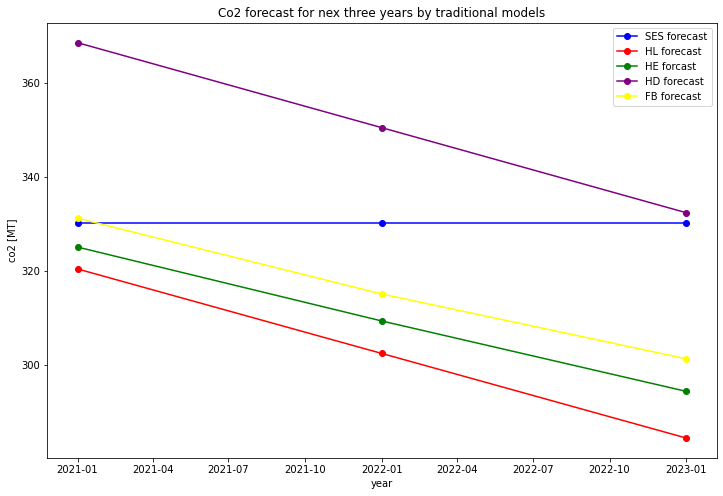

In [ ]:
plt.figure(figsize=(12,8))
#plt.plot(UK_data, marker="o", color="blue")
(line1,) = plt.plot(SES_fcast, marker="o", color="blue")
(line2,) = plt.plot(HL_fcast, marker="o", color="red")
(line3,) = plt.plot(HE_fcast, marker="o", color="green")
(line4,) = plt.plot(HD_fcast, marker="o", color="purple")
(line5,) = plt.plot(FB_fcast, marker="o", color="yellow")
plt.legend([line1, line2, line3,line4,line5], ["SES forecast", "HL forecast", 
                                               'HE forcast', 'HD forecast',
                                               'FB forecast'])
plt.title('Co2 forecast for nex three years by traditional models')
plt.xlabel('year')
plt.ylabel('co2 [MT]')
plt.show()